In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
#add english caterogty to items table

items_df = pd.read_csv('olist_products_dataset.csv')


items_df.drop(['product_name_lenght','product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'], axis=1, inplace=True)

trans_df = pd.read_csv('product_category_name_translation.csv')

items_df = pd.merge(items_df, 
                      trans_df, 
                      on ='product_category_name', 
                      how ='inner')
items_df.head()

,product_id,product_category_name,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,perfumery
2,0d009643171aee696f4733340bc2fdd0,perfumaria,perfumery
3,b1eae565a61935e0011ee7682fef9dc9,perfumaria,perfumery
4,8da90b37f0fb171b4877c124f965b1f6,perfumaria,perfumery


In [4]:
orders_df = pd.read_csv('olist_order_items_dataset.csv')
orders_df.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,9/19/2017 9:45,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,5/3/2017 11:05,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,1/18/2018 14:48,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,8/15/2018 10:10,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2/13/2017 13:57,199.90,18.14


In [5]:
#get only unique items in each order
orders = orders_df.groupby('order_id')['product_id'].unique()

In [6]:
#create edges between procuts in the same order
# create a 2d array [['node1','node2']] with duplicates

prodcut_edges = []

for order in orders:
    if len(order) > 1: 
        for i in range(len(order)):
            for j in range(i+1, len(order)):
                if order[i] != order[j]:
                    prodcut_edges.append([order[i], order[j]])
            
print(len(prodcut_edges))

4481


In [7]:
# Count duplicates deges and add wieghts

edge_with_wieght = []
dict1= {}

set_prodcut_edges = list(set(map(tuple,prodcut_edges)))

for _set in set_prodcut_edges:
    dict1[_set] = 1

for edge1 in prodcut_edges:
    for edge2 in prodcut_edges:
        reg = edge1[0] == edge2[0] and edge1[1] == edge2[1]
        not_reg = edge1[0] == edge2[1] and edge1[1] == edge2[0]
        if reg or not_reg:
            dict1[(edge1[0], edge1[1])] +=1
        
print(dict1)    

{('7a2428849e8c9e1cfac00494791ca876', '744846f62c7ba12b43c59c5ff57782a7'): 2, ('e15cee02291017f6f12b4115ffb417e6', '1d6d7be70107889e3193819aca4dc1dc'): 2, ('c80124276571cd4bef53cf35d9b36c5c', '6b5d792112275a0262356e64e098025f'): 2, ('967ec52b0c55fe9ccde964df30cef64e', '6548c9763cc930450fb8b73c3353812f'): 2, ('d16c0ea701551e609316c77d5c533591', '477aa9a85d7002688bae2cbbd93198f8'): 2, ('02623b0e4e6b951aefb23575de1f3886', 'ec2d43cc59763ec91694573b31f1c29a'): 2, ('18486698933fbb64af6c0a255f7dd64c', 'd2085f7e0f9533605386960fc7e987ec'): 2, ('432357855585cf634fc9923523ce5e4a', 'e2f1ccf86759df28dd1e9f2e0e3242d4'): 2, ('814db92f0cda8c71fa27f4b022cea56f', 'e5eaae7d68dab0ac80b3a5bb888f33f0'): 2, ('a93ad122024312ca432da7f7b32474b4', '306b0c58328826c0564cbc520787d508'): 2, ('ac1fcaf7402bfbf019afdcce1a784ad4', 'b09cd20111b8c27705b617c3b5af7608'): 2, ('315c6373ff469f7b7f60bbb36c319f7b', '6dc18860905adba3a2d55fc1298f1701'): 2, ('eaf84e31d1e891449aa5cf7130e75fc6', 'bdeca320bdf54d3cdbb982d737526dc5'): 2

In [8]:
#Save edges as csv file node1, node2, weight

with open('product_to_product.csv', 'w') as f:
    f.write(f'node1,node2,num_of_carts')
    f.write('\n')
    for key, val in dict1.items():
        f.write(f'{key[0]},{key[1]}, {val}')
        f.write('\n')

In [9]:
#load graph network

product_edges_df = pd.read_csv('product_to_product.csv')

g = nx.from_pandas_edgelist(product_edges_df, 'node1', 'node2', ['num_of_carts'])

print(f'Nodes: {g.number_of_nodes()}')
print(f'Edges: {g.number_of_edges()}')

Nodes: 4885
Edges: 4058


In [10]:
print(f'Number of connected components in the network: {nx.number_connected_components(g)}')

Number of connected components in the network: 1652


In [11]:
#get all connected components in the graph
Gcc = sorted(nx.connected_components(g), key=len, reverse=True)

In [138]:
print(len(Gcc[0]))

398


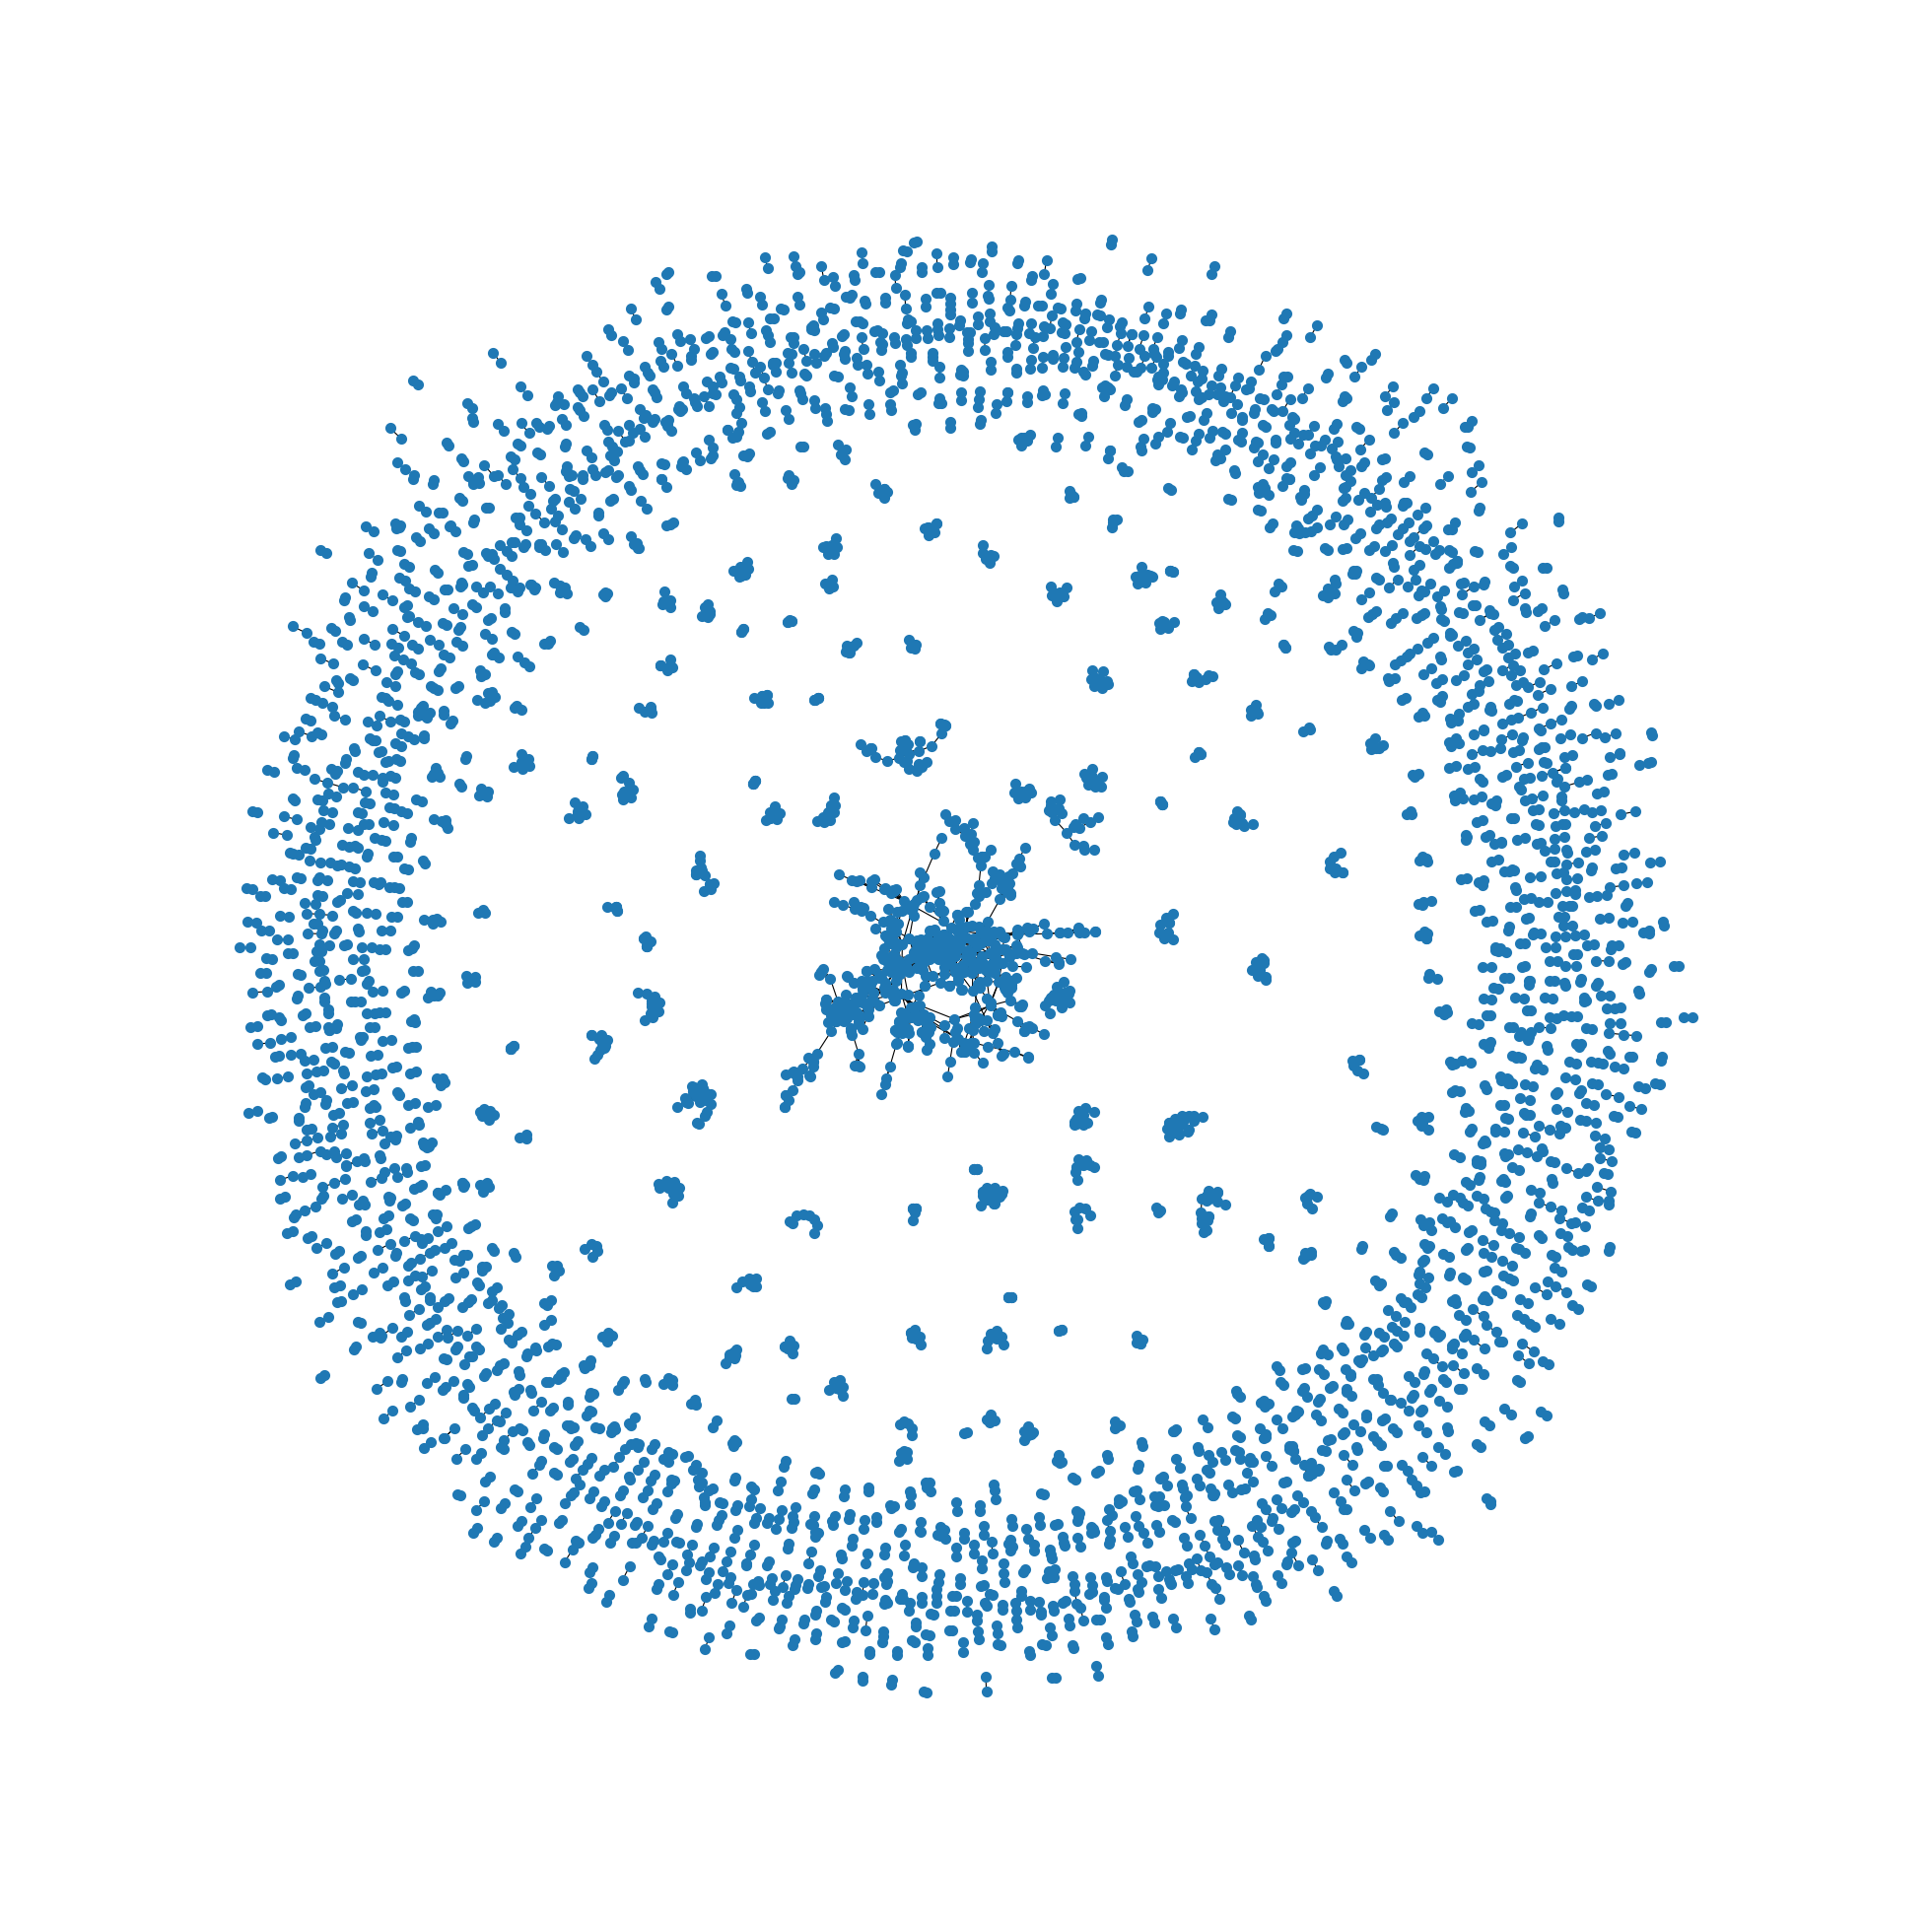

In [135]:
#draw greatest connected component in the network

plt.figure(num=None, figsize=(5, 5), dpi=400)
pos = nx.spring_layout(g) # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(g, pos, node_size=1)

# edges
nx.draw_networkx_edges(g, pos, width=0.2)

# .subgraph(Gcc[0])


ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

In [13]:
#betweens centrality in the GCC of the graph - ignore the edges weights
nx.betweenness_centrality(g.subgraph(Gcc[0]))

{'12a3f3a8ef6c5e3c29c88e670fd61ee9': 0.0,
 '9a469eaf45dfbc43d39ba1977a3c07af': 0.0,
 '87064fd995f81ddb8e735902047fe007': 0.0,
 'a39cc58c1b5926b6f9f378daa89f1315': 0.13546039742513294,
 '77922dd87928c2cf9225946dac2a27a7': 0.0,
 '8c591ab0ca519558779df02023177f44': 0.0,
 'b141c668aca84c5877a5c66bd94fedc8': 0.0004841808997980283,
 '120fa011365fc39efe382cba4e50999e': 0.03964073989262906,
 'ba92b5a0701d2f820ba6ca8f8c86294f': 0.16130024001560528,
 '1c55a8be0613dd888ed9c039cea3d660': 0.010050123400249345,
 '06edb72f1e0c64b14c5b79353f7abea3': 0.07738236773615757,
 '113f80f12c8892f0c59206f70b862b40': 0.0299595450728952,
 'cbdb9bf611328898bd4b32a384506b3a': 0.005037783375314861,
 '349ce46a0e2e20054aa9d80c48af8816': 0.005037783375314861,
 '635041fb8431d6de8a42741bab6caa9f': 0.0,
 '16dd49ee10e688f75c41e83b4863f85b': 0.0,
 '4fe644d766c7566dbc46fb851363cb3b': 0.010050123400249345,
 '97759b2e2035fcd87986a43119b56c7d': 0.0,
 '6a0713a63e990052795623e76cc2995e': 0.0,
 'a12fc4a1c79238df0015e1a0c48f0314': 

In [14]:
#betweens centrality in the GCC of the graph - use the edges weights
nx.betweenness_centrality(g.subgraph(Gcc[0]), weight='num_of_carts')

{'12a3f3a8ef6c5e3c29c88e670fd61ee9': 0.0,
 '9a469eaf45dfbc43d39ba1977a3c07af': 0.0,
 '87064fd995f81ddb8e735902047fe007': 0.0,
 'a39cc58c1b5926b6f9f378daa89f1315': 0.1367834516449126,
 '77922dd87928c2cf9225946dac2a27a7': 0.0,
 '8c591ab0ca519558779df02023177f44': 0.0,
 'b141c668aca84c5877a5c66bd94fedc8': 0.0008906535669759852,
 '120fa011365fc39efe382cba4e50999e': 0.039560169283091196,
 'ba92b5a0701d2f820ba6ca8f8c86294f': 0.16192572237912287,
 '1c55a8be0613dd888ed9c039cea3d660': 0.010050123400249345,
 '06edb72f1e0c64b14c5b79353f7abea3': 0.0850311317565726,
 '113f80f12c8892f0c59206f70b862b40': 0.0299595450728952,
 'cbdb9bf611328898bd4b32a384506b3a': 0.005037783375314861,
 '349ce46a0e2e20054aa9d80c48af8816': 0.005037783375314861,
 '635041fb8431d6de8a42741bab6caa9f': 0.0,
 '16dd49ee10e688f75c41e83b4863f85b': 0.0,
 '4fe644d766c7566dbc46fb851363cb3b': 0.010050123400249345,
 '97759b2e2035fcd87986a43119b56c7d': 0.0,
 '6a0713a63e990052795623e76cc2995e': 0.0,
 'a12fc4a1c79238df0015e1a0c48f0314': 0

In [15]:
#calculate communities by girvan newman
communities_generator = nx.community.girvan_newman(g.subgraph(Gcc[0]))
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
girvan_newman_comm = sorted(map(sorted, next_level_communities),key=len, reverse=True)

print(f'Num of communities: {girvan_newman_comm}')

Num of communities: [['0615dcf981da53a5ca8777cd6a80361b', '066cc58255ee9ccb3e6da9d3edd02a7e', '06ecc3d4006ad6eb293a1b93ec3c7183', '08056d78bb75ed3ace107c72c16ec511', '09b0d15a8cc9a84e7af7e0225f67dc45', '0b13080e2bf193c4ff096b09e0758c7d', '0bcc3eeca39e1064258aa1e932269894', '0fbf220f61720a67fc0d6432cb32a5b4', '120fa011365fc39efe382cba4e50999e', '14081f2d6a3ce46cfa9d852c9b1b92ba', '181ce2dfd0a0d91969baabcb6df39bb9', '1b7ce992a80ac036dd9ab73d08289712', '1ba4e3fe92f16fd5a8942f7b7d804b52', '1c55a8be0613dd888ed9c039cea3d660', '1ebde342c905182ffc07333fc569c590', '27c0cea4dc76549f5bd124d9cad0ae3b', '281a67fd770c975ee1a7c842468fb3b5', '2ae5ed1d99afbb14a8b24041a81df16b', '2b10e945dae5434075c8bb2be0d17325', '2b939dc9b176d7fa21594d588815d4a4', '2ef36e1cae01b86d0ff0a2f50ff2bd53', '2ff995aead9c63a1f37a07b3664ead37', '322083bacc83416f56c4110e0216c2e1', '349ce46a0e2e20054aa9d80c48af8816', '368c6c730842d78016ad823897a372db', '372645c7439f9661fbbacfd129aa92ec', '3773a3773f5978591cff7b3e614989b3', '386ee

In [16]:
#calculate communities by louvain
louvain_comm = nx.community.louvain_communities(g.subgraph(Gcc[0]), weight='num_of_carts')

print(f'Num of communities: {louvain_comm}')

Num of communities: [{'8af5b5f4f89849cc4dce36dee73dd9de', '7b5d8be0e04080e4c8ee6a7ec2f1f597', 'a39cc58c1b5926b6f9f378daa89f1315', '5d6bea33648f018dbb563f3a2fab09f3', '4cceacaeb21aa22aa51b4c724de3758d', '555cf217f3f7376ea7ba4af273c56739', 'b9055c6417cea84a8198fec56ff6148f', '5c9d92777b62444d9fbffe92338d9e21', '349ce46a0e2e20054aa9d80c48af8816', '810e2944bca9850b934e1570ba372e7d', '5a75c30c323b0ae56499ef163504648a', '066cc58255ee9ccb3e6da9d3edd02a7e', '9ada4c8f4e072df42ff63b30520b6975', 'da7da0c2d3f2dbb32bee4ad3cf467fc6', '09b0d15a8cc9a84e7af7e0225f67dc45', '3f1361100ad34281edf04ce745f62b89'}, {'42a2bd596fda1baef5719cb74f73030c', '283dc451ad3918badb976d56ff887289', 'b570f2a8228eeaa87e224f25264576b5', '98b22c1129886cbd7fcae69d1c93e442', '430f4c8e02bd4e1fe6330c38689b54f3', 'a04f52ded97b5530e8783e3c002b90f0', '1a2d00b771a438bee7055bbd0086e003', '3cc4b421c1f28dd22e86fc4aaafb600e', '9cb3c4a5a0a1c8536b2651af5f73e403', '16dd49ee10e688f75c41e83b4863f85b', '0e9923b15d37f33cac70de6648429148', 'b8f

In [17]:
girvan_newman_mod = nx.community.modularity(g.subgraph(Gcc[0]), girvan_newman_comm)
louvain_mod = nx.community.modularity(g.subgraph(Gcc[0]), louvain_comm)

print(f'Modularity by girvan newman communities: {girvan_newman_mod}')
print(f'Modularity by louvain communities: {louvain_mod}')

Modularity by girvan newman communities: 0.642267673078484
Modularity by louvain communities: 0.8660855450044639


<h6>We choose the communities partitions by louvain, because the modularity score is better</h6>

In [18]:
# comm = sorted( comm, key=len, reverse=True )

print(f'******* Total {len(louvain_comm)} communities ***********')
print('\n')
print('\n')

for com in louvain_comm:
    print(f"******** Community Size: {len(com)} **********")
    print(items_df.loc[items_df['product_id'].isin(com)]['product_category_name_english'].value_counts())
    print(f"************************************")
    print('\n')
    print('\n')

******* Total 21 communities ***********




******** Community Size: 16 **********
furniture_decor              10
construction_tools_lights     4
garden_tools                  1
home_construction             1
Name: product_category_name_english, dtype: int64
************************************




******** Community Size: 12 **********
bed_bath_table    12
Name: product_category_name_english, dtype: int64
************************************




******** Community Size: 9 **********
baby          4
cool_stuff    4
auto          1
Name: product_category_name_english, dtype: int64
************************************




******** Community Size: 8 **********
sports_leisure    4
health_beauty     4
Name: product_category_name_english, dtype: int64
************************************




******** Community Size: 21 **********
bed_bath_table     15
furniture_decor     5
home_confort        1
Name: product_category_name_english, dtype: int64
************************************




****

In [19]:
#betweenes centraliti inside specific community
nx.betweenness_centrality(g.subgraph(louvain_comm[0]), weight='num_of_carts')

{'8af5b5f4f89849cc4dce36dee73dd9de': 0.0,
 '7b5d8be0e04080e4c8ee6a7ec2f1f597': 0.0,
 'a39cc58c1b5926b6f9f378daa89f1315': 0.7047619047619048,
 '09b0d15a8cc9a84e7af7e0225f67dc45': 0.5523809523809524,
 '5d6bea33648f018dbb563f3a2fab09f3': 0.5714285714285715,
 '4cceacaeb21aa22aa51b4c724de3758d': 0.0,
 '555cf217f3f7376ea7ba4af273c56739': 0.0,
 'b9055c6417cea84a8198fec56ff6148f': 0.0,
 '5c9d92777b62444d9fbffe92338d9e21': 0.0,
 '349ce46a0e2e20054aa9d80c48af8816': 0.13333333333333336,
 '810e2944bca9850b934e1570ba372e7d': 0.13333333333333336,
 '066cc58255ee9ccb3e6da9d3edd02a7e': 0.0,
 '9ada4c8f4e072df42ff63b30520b6975': 0.0,
 'da7da0c2d3f2dbb32bee4ad3cf467fc6': 0.0,
 '5a75c30c323b0ae56499ef163504648a': 0.0,
 '3f1361100ad34281edf04ce745f62b89': 0.0}

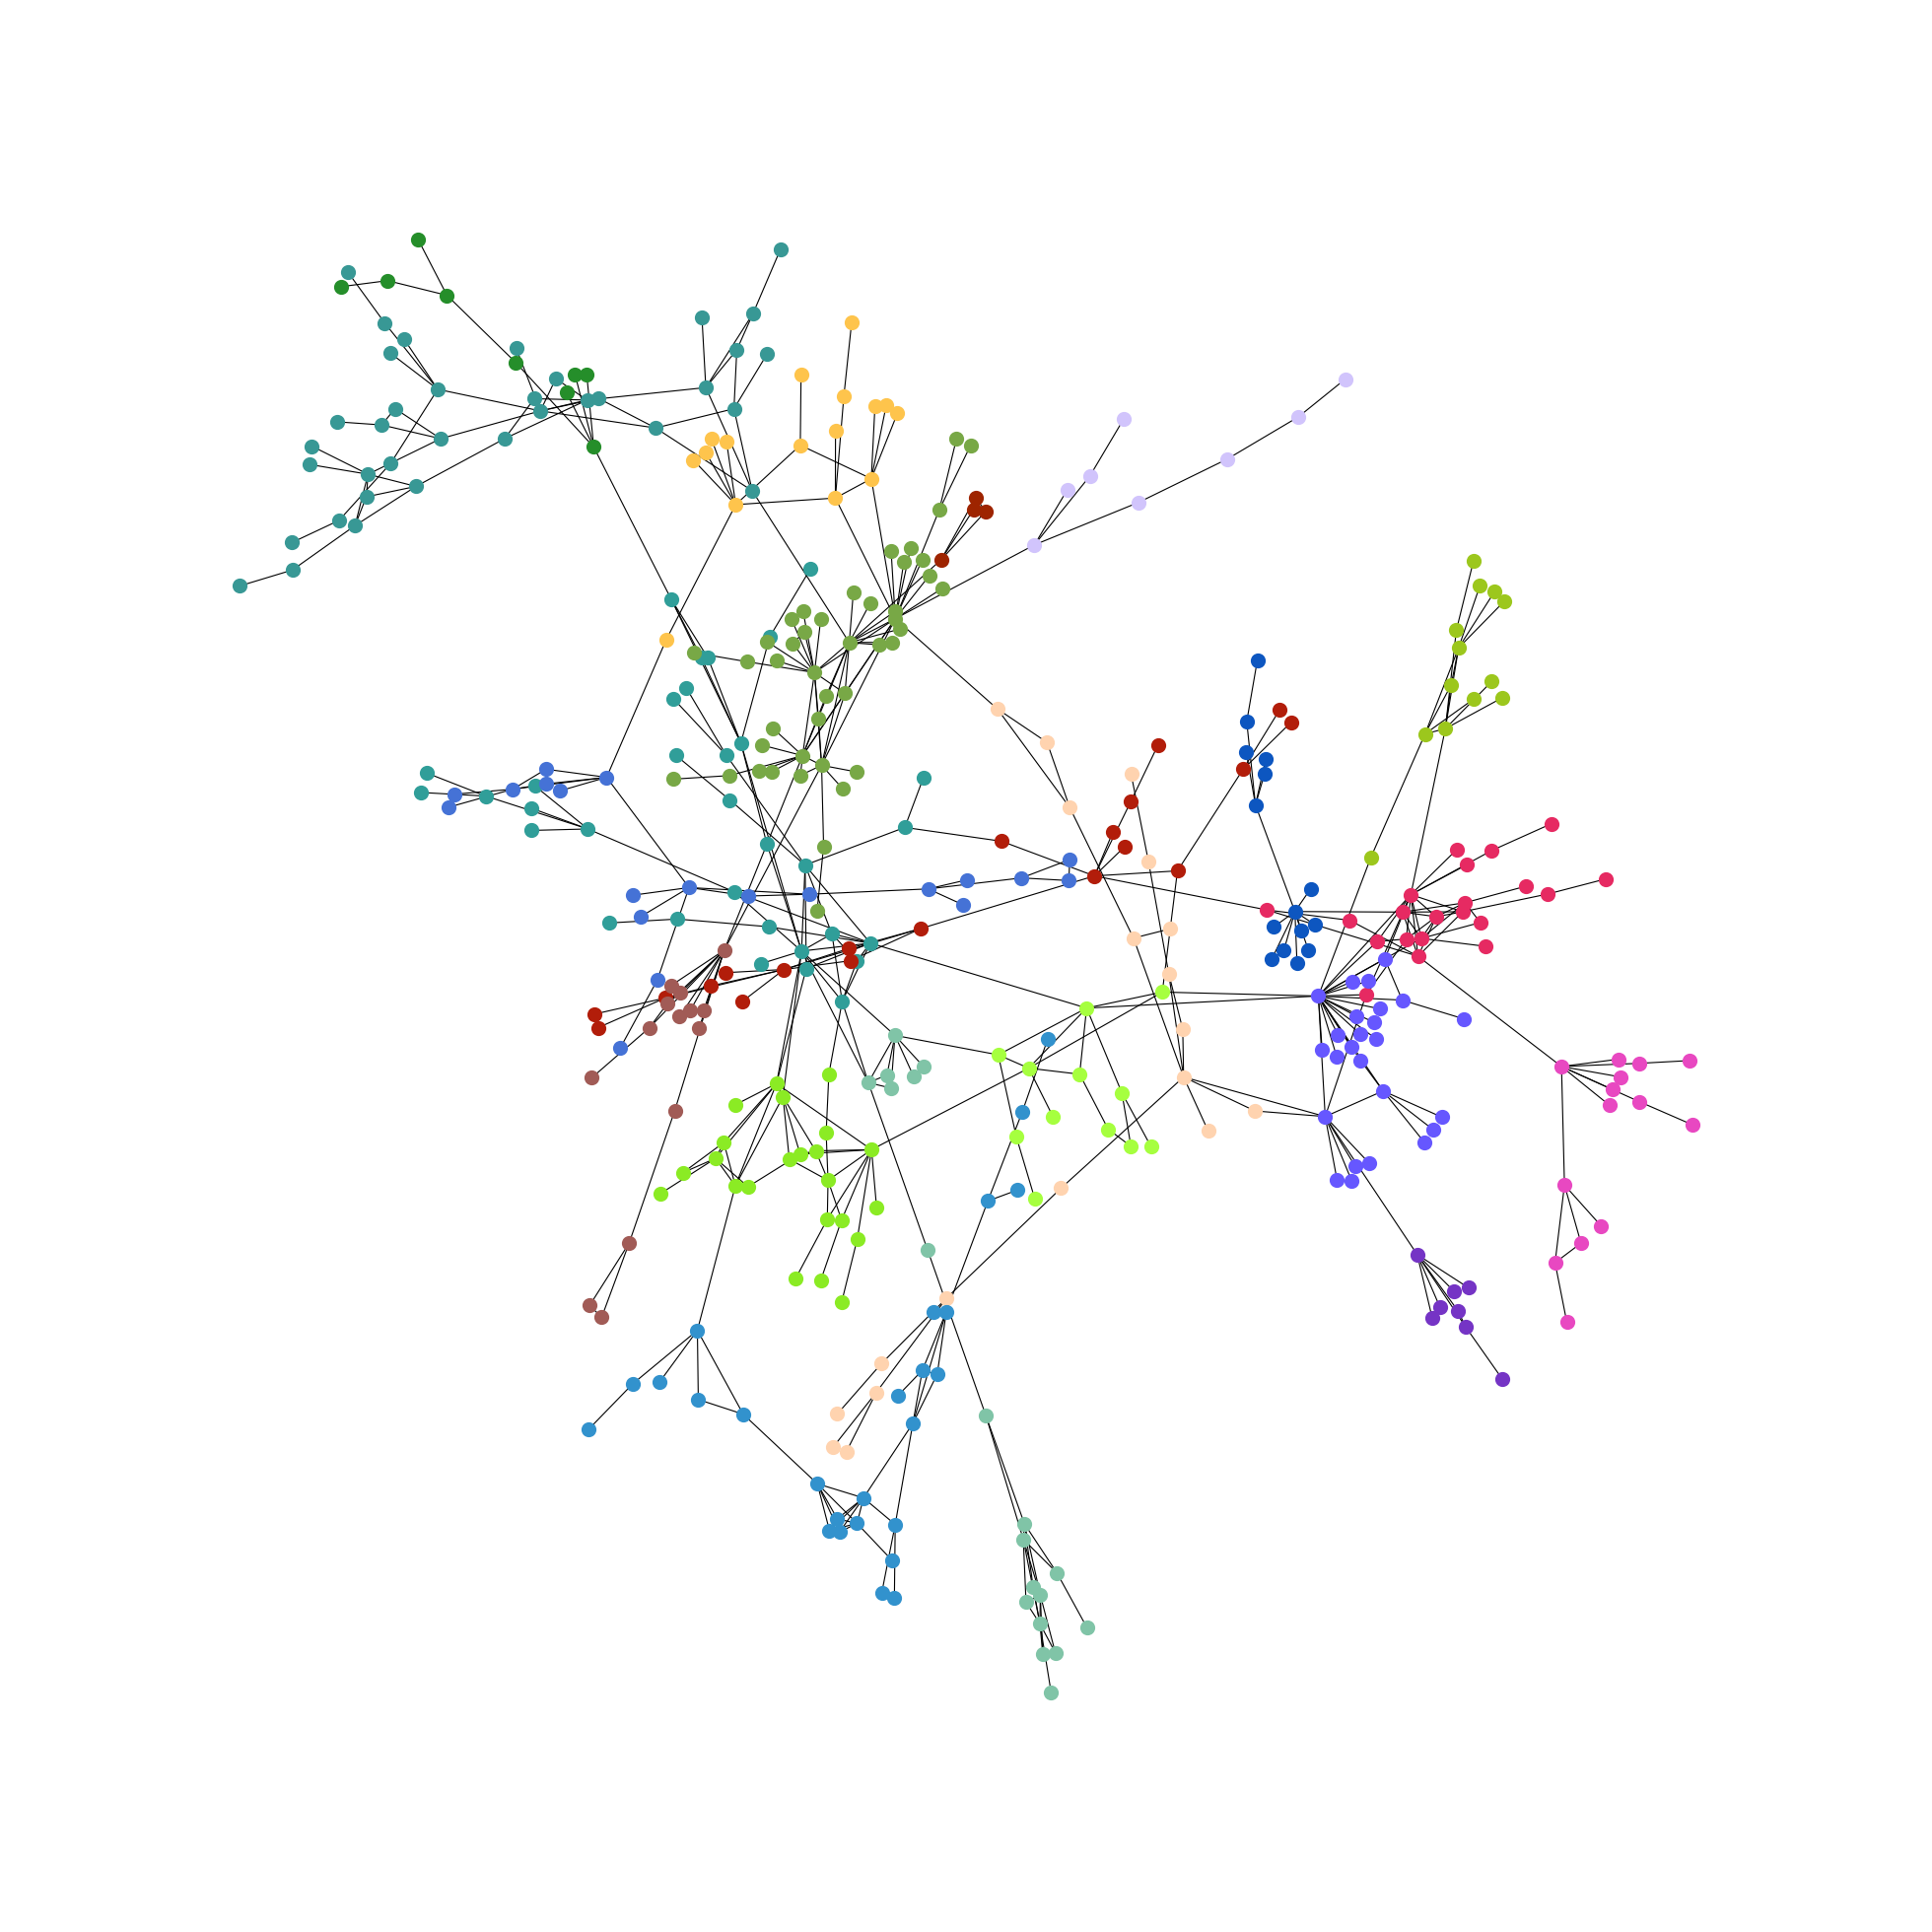

In [30]:
#draw greatest connected component colored by communities in the network

import random


plt.figure(num=None, figsize=(5, 5), dpi=400)
pos = nx.spring_layout(g.subgraph(Gcc[0])) # positions for all nodes - seed for reproducibility

# nodes
for com in louvain_comm:
    r = lambda: random.randint(0,255)
    color = '#%02X%02X%02X' % (r(),r(),r())
    nx.draw_networkx_nodes(g.subgraph(Gcc[0]), pos, node_size=3, nodelist=com, node_color=color)

# edges
nx.draw_networkx_edges(g.subgraph(Gcc[0]), pos, width=0.2)


ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

In [51]:
def find_node_community(_id, communities):
    for comm in communities:
        if _id in comm:
            return comm

In [82]:
def get_highest_node_betweenes_in_community(g, community, label=None):
    betweenness = nx.betweenness_centrality(g.subgraph(community), weight=label)
    max_id = max(betweenness, key=betweenness.get)
    return (max_id, betweenness[max_id])

In [85]:
def get_max_jaccard_coefficient(_id, ids_to_check):
    jaccard_scores = []
    for id_to_check in ids_to_check:
        if _id != id_to_check:
            jaccard_scores.append(next(nx.jaccard_coefficient(g, [(_id, id_to_check)])))
    
    jaccard_scores = sorted(jaccard_scores, key = lambda x: x[2], reverse=True)
    max_jaccard_id = jaccard_scores[0][1]
    max_jaccard_score = jaccard_scores[0][2]
    
    return (max_jaccard_id, max_jaccard_score)
    

In [115]:
def get_category_by_id(_id):
    return items_df.loc[items_df['product_id'] == _id][['product_category_name_english']].values[0][0]

In [130]:
def reccomendation_data(_id):


    print(f'Product Id: {_id}, category: {get_category_by_id(_id)}\n')


    com = find_node_community(_id, louvain_comm)
    max_betweenes_id, high_betweenes = get_highest_node_betweenes_in_community(g, com, 'num_of_carts')
    print(f'Max betweenes id: {max_betweenes_id}, score: {high_betweenes}, category: {get_category_by_id(max_betweenes_id)}')


    max_jaccard_id_by_community, high_jaccard_by_community = get_max_jaccard_coefficient(_id, com)
    print(f'Max jaccard by community id: {max_jaccard_id_by_community}, score: {high_jaccard_by_community}, category: {get_category_by_id(max_jaccard_id_by_community)}')


    max_jaccard_id_by_gcc, high_jaccard_by_gcc = get_max_jaccard_coefficient(_id, Gcc[0])
    print(f'Max jaccard by gcc id: {max_jaccard_id_by_gcc}, score: {high_jaccard_by_gcc}, category: {get_category_by_id(max_jaccard_id_by_gcc)}')
    
    
    return(set({max_betweenes_id, max_jaccard_id_by_community, max_jaccard_id_by_gcc}))


In [131]:
tet = reccomendation_data(next(iter(louvain_comm[4])))

print(tet)

Product Id: 52b668edc0d0c20cd9319bfda4019597, category: furniture_decor

Max betweenes id: 3e5201fe0d1ba474d9b90152c83c706c, score: 0.5473684210526316, category: bed_bath_table
Max jaccard by community id: cd3de1984e1a77b441e1b39b8e334330, score: 0.2, category: furniture_decor
Max jaccard by gcc id: cd3de1984e1a77b441e1b39b8e334330, score: 0.2, category: furniture_decor
{'cd3de1984e1a77b441e1b39b8e334330', '3e5201fe0d1ba474d9b90152c83c706c'}
